# Insurance Claims- Fraud Detection case study

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



Importing the required libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [129]:
#Loading the dataset
data=pd.read_csv('Insurance-claim.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [194]:
# Dataframe for dataset
ds=pd.DataFrame(data=data)

# EDA

In [195]:
# Gettign information about data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Key Observation: 1) We have 1000 rows and 40 columns in the dataset. 2) There are 21 object type variables and 19 numeric variables
    (3) The target variable is categorical.

In [196]:
# we can drop the customerId variable since it is not contributing
#ds.drop(['_c39'],axis=1,inplace=True)

In [197]:
# checking null values
ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There is no null value in the data set

<AxesSubplot:>

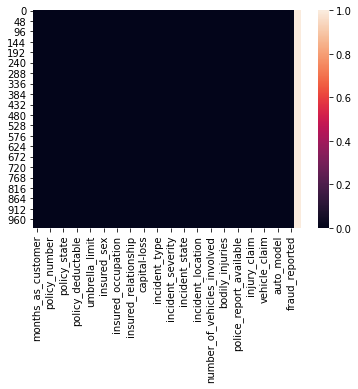

In [198]:
sns.heatmap(ds.isnull())

The heat map also shows there is no null values in the data set.

In [199]:
#Summary Statistics
ds.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Key observations: 1) There is not much differnce between mean value and 50% for almost all the columns.
    2)there is a difrrence between 75% & Max for most of the columns, Whicgh shows there are outliers presents.

<AxesSubplot:>

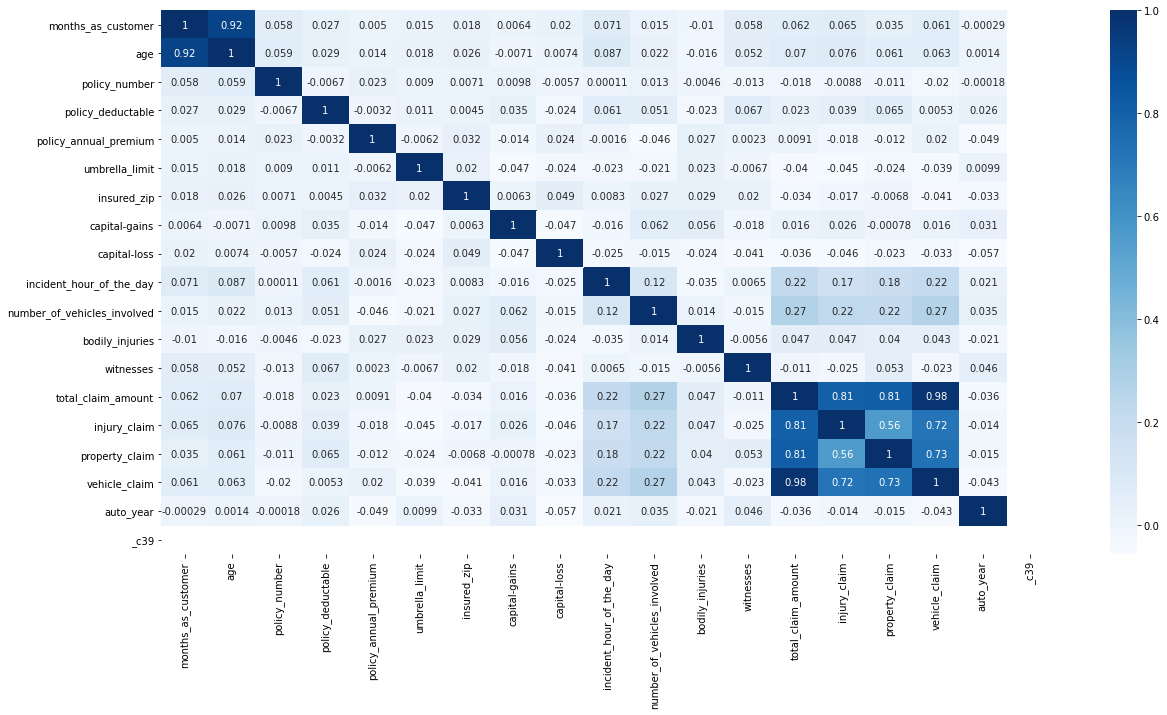

In [200]:
# Correlation Matrix ---Pearson Method
fig =plt.figure(figsize=(20,10))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

Key Observatopn" Injury_ claim and Vehicle_claim are highly correlated.Wittnes & Vehicle_claim are negatively correlated. 
Part from it there don’t seem to be much correlations in the data

In [201]:
# we can drop the customerId variable since it is not contributing
#ds=ds.drop(['months_as_customer','policy_number','policy_bind_date','policy_csl','incident_date','incident_location','insured_zip'],axis=1,inplace=True)

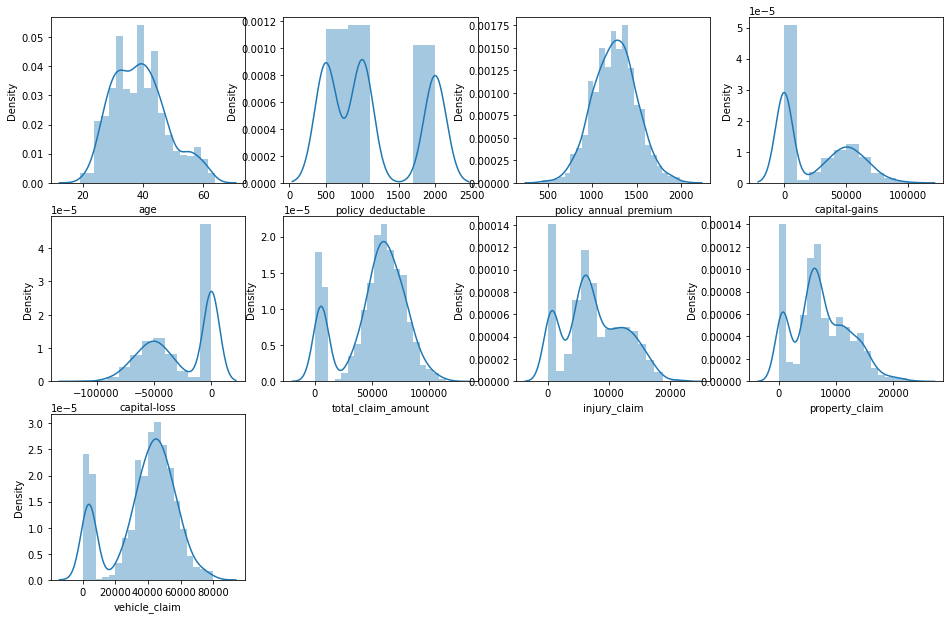

In [202]:
# Ploting the the hotogram to check the normal curve.
col=['age','policy_deductable','policy_annual_premium','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']
plt.figure(figsize=(16,14))
l=1
for i in col :
    plt.subplot(4,4,l)
    sns.distplot(ds[i])
    l=l+1
plt.show()

Key Observation: Most of the data is Normally Distributed

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

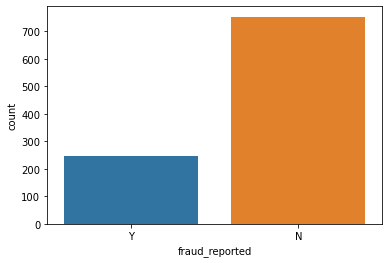

In [203]:
sns.countplot(x='fraud_reported',data=ds)

There is class Imbalance in the target variable

<AxesSubplot:xlabel='policy_state', ylabel='count'>

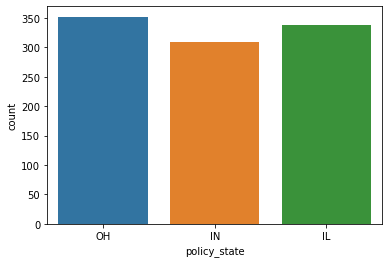

In [204]:
sns.countplot(x='policy_state',data=ds)

All the three US states have equal numbr of policy subscription

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

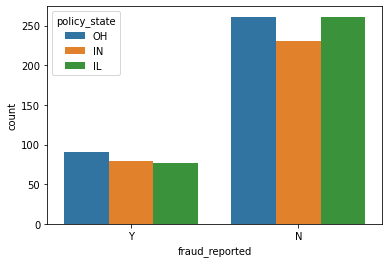

In [205]:
# Ploting target variable against the policy_state
sns.countplot(x=ds['fraud_reported'],hue=ds['policy_state'],data=ds)

Key Observation: Most of the faraud cases  have been reported from OH states then In state. 

In [206]:
ds['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

People who are working as machine-op-inspct has claimed more fraud transactions

In [207]:
ds['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

Female are more in number then male.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

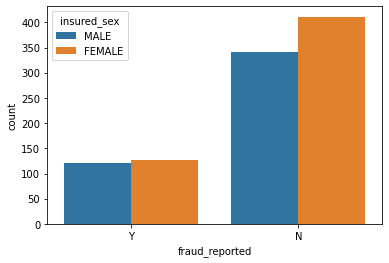

In [208]:
sns.countplot(x=ds['fraud_reported'],hue='insured_sex',data=ds)

 Male and female both have claimed same in number which are fraud

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

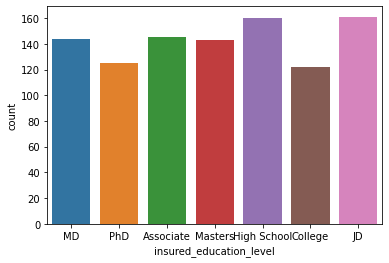

In [209]:
sns.countplot(x='insured_education_level',data=ds)

Most of the insured people have MD, PHD or Masters or JD as qualiifcation

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

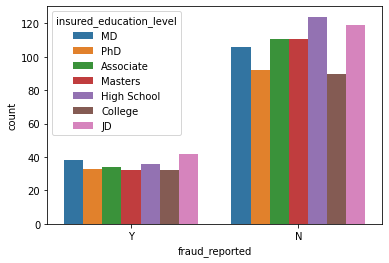

In [210]:
sns.countplot(x=ds['fraud_reported'],hue='insured_education_level',data=ds)

People with qulaifaction MD,JD and High school have reported more fraud.

In [211]:
ds['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

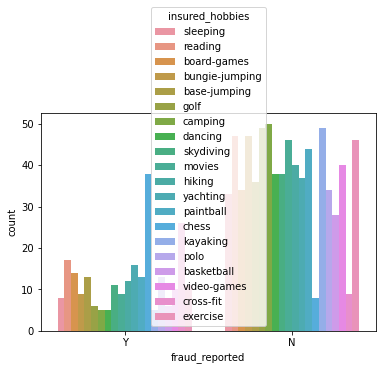

In [212]:
sns.countplot(x=ds['fraud_reported'],hue='insured_hobbies',data=ds)

Key Obseervation: The poeple with hobbies like Paintball,Yatching are reporting more fraud claims.

In [213]:
ds['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

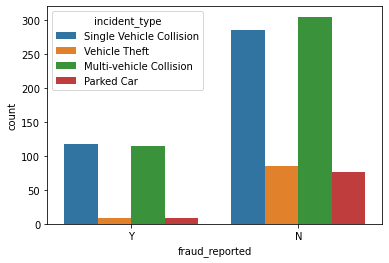

In [214]:
sns.countplot(x=ds['fraud_reported'],hue='incident_type',data=ds)

Key Obseervation: The poeple with incident type Single and Multi vehicle collision have reported more fraud claims.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

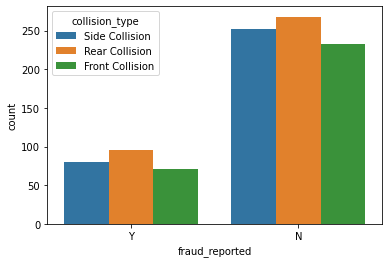

In [215]:
sns.countplot(x=ds['fraud_reported'],hue='collision_type',data=ds)

Key Observation: The poeple with rear collision incident type have reported more fraud claims

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

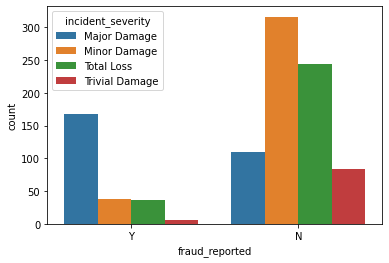

In [216]:
sns.countplot(x=ds['fraud_reported'],hue='incident_severity',data=ds)

Key Observation: The poeple with Minor damage have reported second most more fraud claims

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

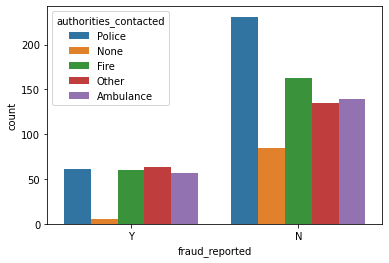

In [217]:
sns.countplot(x=ds['fraud_reported'],hue='authorities_contacted',data=ds)

Key Observation: The poeple who have not contacted the authorities have reported second most more fraud claims

# Finding Outliers and Skewness

months_as_customer                AxesSubplot(0.125,0.125;0.032563x0.755)
age                            AxesSubplot(0.164076,0.125;0.032563x0.755)
policy_number                  AxesSubplot(0.203151,0.125;0.032563x0.755)
policy_deductable              AxesSubplot(0.242227,0.125;0.032563x0.755)
policy_annual_premium          AxesSubplot(0.281303,0.125;0.032563x0.755)
umbrella_limit                 AxesSubplot(0.320378,0.125;0.032563x0.755)
insured_zip                    AxesSubplot(0.359454,0.125;0.032563x0.755)
capital-gains                  AxesSubplot(0.398529,0.125;0.032563x0.755)
capital-loss                   AxesSubplot(0.437605,0.125;0.032563x0.755)
incident_hour_of_the_day       AxesSubplot(0.476681,0.125;0.032563x0.755)
number_of_vehicles_involved    AxesSubplot(0.515756,0.125;0.032563x0.755)
bodily_injuries                AxesSubplot(0.554832,0.125;0.032563x0.755)
witnesses                      AxesSubplot(0.593908,0.125;0.032563x0.755)
total_claim_amount             AxesSub

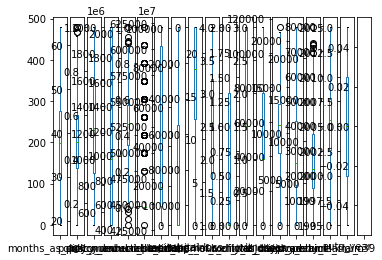

In [218]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,20))

We can see from the box plot above tht there are outliers present in the data set.Lets check separately

<AxesSubplot:>

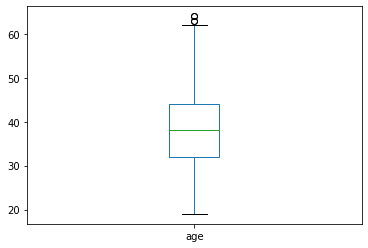

In [219]:
ds['age'].plot.box()

There is outliers present in the age column.

<AxesSubplot:>

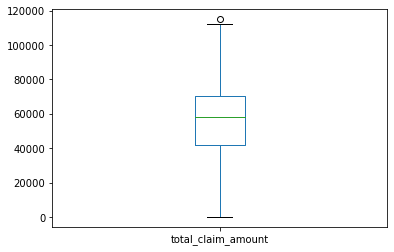

In [220]:
ds['total_claim_amount'].plot.box()

There is outliers present in the above column

<AxesSubplot:>

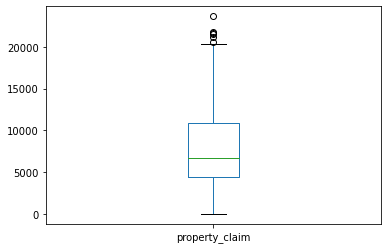

In [221]:
ds['property_claim'].plot.box()

In [222]:
#Checkking skewness
ds.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64

Keeping the skewness range +0.5/-0.5, then we can see there are skweness in most of the columns. columns.Lets reduce the skewness from above features.

# Data Wrangling

In [223]:
# Removing outliers
m=ds[['age','property_claim','total_claim_amount']]

In [224]:
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([500], dtype=int64), array([1], dtype=int64))


In [225]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here one rows will be droped

shape before remooving the outliers: (1000, 40)
shape after remooving the outliers: (999, 40)


In [226]:
#Checkking skewness
dsnew.skew()

months_as_customer             0.363903
age                            0.477622
policy_number                  0.037193
policy_deductable              0.476426
policy_annual_premium          0.003948
umbrella_limit                 1.805104
insured_zip                    0.820020
capital-gains                  0.481294
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034240
number_of_vehicles_involved    0.501009
bodily_injuries                0.016637
witnesses                      0.021243
total_claim_amount            -0.594045
injury_claim                   0.264963
property_claim                 0.355621
vehicle_claim                 -0.619587
auto_year                     -0.049282
_c39                                NaN
dtype: float64

In [227]:
# identify variables with '?' values
unknowns = {}
for i in list(dsnew.columns):
    if (dsnew[i]).dtype == object:
        j = np.sum(dsnew[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                         0
policy_bind_date         0
policy_state             0
policy_csl               0
insured_sex              0
insured_education_level  0
insured_occupation       0
insured_hobbies          0
insured_relationship     0
incident_date            0
incident_type            0
collision_type           0
incident_severity        0
authorities_contacted    0
incident_state           0
incident_city            0
incident_location        0
property_damage          0
police_report_available  0
auto_make                0
auto_model               0
fraud_reported           0


In [228]:
# Treating the variables having ? 
dsnew['police_report_available']=dsnew['police_report_available'].replace({'?':np.nan})
dsnew['police_report_available']=dsnew['police_report_available'].fillna(method='ffill')

In [229]:
# Replacing the ? in collision_type varibale
dsnew['collision_type']=dsnew['collision_type'].replace({'?':np.nan})
dsnew['collision_type']=dsnew['collision_type'].fillna(method='ffill')

In [230]:
# Replacing the ? in property_damage varibale
dsnew['property_damage']=dsnew['property_damage'].replace({'?':np.nan})
dsnew['property_damage']=dsnew['property_damage'].fillna(method='ffill')

In [231]:
# we can drop the customerId variable since it is not contributing
dsnew=dsnew.drop(['months_as_customer','_c39','policy_number','policy_bind_date','policy_csl','incident_date','incident_location','insured_zip','auto_year'],axis=1)

In [232]:
dsnew.shape

(999, 31)

In [233]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in dsnew.columns:
    if dsnew[i].dtypes=='object':
        dsnew[i]=oe.fit_transform(dsnew[i].values.reshape(-1,1))
dsnew

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,48,2.0,1000,1406.91,0,1.0,4.0,2.0,17.0,0.0,...,1,2,1.0,71610,6510,13020,52080,10.0,1.0,1.0
1,42,1.0,2000,1197.22,5000000,1.0,4.0,6.0,15.0,2.0,...,0,0,1.0,5070,780,780,3510,8.0,12.0,1.0
2,29,2.0,2000,1413.14,5000000,0.0,6.0,11.0,2.0,3.0,...,2,3,0.0,34650,7700,3850,23100,4.0,30.0,0.0
3,41,0.0,2000,1415.74,6000000,0.0,6.0,1.0,2.0,4.0,...,1,2,0.0,63400,6340,6340,50720,3.0,34.0,1.0
4,44,0.0,1000,1583.91,6000000,1.0,0.0,11.0,2.0,4.0,...,0,1,0.0,6500,1300,650,4550,0.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,2.0,1000,1310.80,0,0.0,5.0,2.0,13.0,4.0,...,0,1,1.0,87200,17440,8720,61040,6.0,6.0,0.0
996,41,0.0,1000,1436.79,0,0.0,6.0,9.0,17.0,5.0,...,2,3,1.0,108480,18080,18080,72320,13.0,28.0,0.0
997,34,2.0,500,1383.49,3000000,0.0,5.0,1.0,3.0,2.0,...,2,3,1.0,67500,7500,7500,52500,11.0,19.0,0.0
998,62,0.0,2000,1356.92,5000000,1.0,0.0,5.0,0.0,5.0,...,0,1,1.0,46980,5220,5220,36540,1.0,5.0,0.0


In [236]:
x=dsnew.drop(columns=['fraud_reported'])
y=dsnew['fraud_reported']

In [237]:
x.shape

(999, 30)

In [238]:
y.shape

(999,)

In [239]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [240]:
x_over.shape

(1504, 30)

In [241]:
y_over.shape

(1504,)

In [242]:
y_over.value_counts()

0.0    752
1.0    752
Name: fraud_reported, dtype: int64

In [243]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_over=scale.fit_transform(x_over)
x_over

array([[ 1.01561105,  1.24366014, -0.25702025, ...,  0.68920785,
         0.94966902, -1.74904164],
       [ 0.33232811, -0.02652773,  1.45650125, ..., -2.14413104,
         0.4204675 , -0.69665607],
       [-1.14811827,  1.24366014,  1.45650125, ..., -1.00134519,
        -0.63793555,  1.0254294 ],
       ...,
       [ 1.12949154,  0.04731624, -0.157636  , ...,  1.06441962,
         1.72808841,  0.72840898],
       [-0.57871582, -0.02652773,  1.10522934, ...,  0.94687426,
         0.99834921,  0.08631649],
       [ 2.26829644, -0.06728576, -0.28615011, ...,  1.02947685,
         1.65007515,  0.12397385]])

In [244]:
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.7986725663716814 on random state 66


In [245]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(699, 30)
(300, 30)
(699,)
(300,)


70% of the data (699 rows) will be available for training the model & 30% (300 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore,evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report,Auc ROC curve

In [246]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.77
[[227   2]
 [ 67   4]]
              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87       229
         1.0       0.67      0.06      0.10        71

    accuracy                           0.77       300
   macro avg       0.72      0.52      0.49       300
weighted avg       0.75      0.77      0.69       300



In [247]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6966666666666667
[[190  39]
 [ 52  19]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       229
         1.0       0.33      0.27      0.29        71

    accuracy                           0.70       300
   macro avg       0.56      0.55      0.55       300
weighted avg       0.68      0.70      0.69       300



In [248]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8133333333333334
[[197  32]
 [ 24  47]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       229
         1.0       0.59      0.66      0.63        71

    accuracy                           0.81       300
   macro avg       0.74      0.76      0.75       300
weighted avg       0.82      0.81      0.82       300



In [249]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7466666666666667
[[223   6]
 [ 70   1]]
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85       229
         1.0       0.14      0.01      0.03        71

    accuracy                           0.75       300
   macro avg       0.45      0.49      0.44       300
weighted avg       0.61      0.75      0.66       300



In [250]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.7633333333333333
[[229   0]
 [ 71   0]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87       229
         1.0       0.00      0.00      0.00        71

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300



In [251]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8
[[213  16]
 [ 44  27]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       229
         1.0       0.63      0.38      0.47        71

    accuracy                           0.80       300
   macro avg       0.73      0.66      0.68       300
weighted avg       0.78      0.80      0.78       300



In [252]:
# Ada Boost Classifer
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier(n_estimators=100,random_state=42,algorithm='SAMME')
#Adabosstclassifier(100)----Default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.8166666666666667
[[209  20]
 [ 35  36]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       229
         1.0       0.63      0.38      0.47        71

    accuracy                           0.80       300
   macro avg       0.73      0.66      0.68       300
weighted avg       0.78      0.80      0.78       300



Based on the results of above models, and comparing the Accuracy score and other evaluation matrics result of recall, precision. Accuracy_Score 1) LogisticRegression 0.77 2)Gaussian Naive_bayes 0.70 3)DecisionTreeClassifier 0.81 (4) Random Forest Classifier 0.80 5)AdaBoost Classifier 0.81 6)KNN Calssifier 0.75

Decision Tree Classifier & Ada Boost classifier have the best accuracy score and highest precision and F1 values among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation.

# Cross Validation

In [253]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.725      0.665      0.535      0.75       0.71859296]
0.6787185929648242 0.07701455305845357


In [254]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.755      0.75       0.725      0.755      0.75879397]
0.7487587939698492 0.012203531813889282


In [255]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.74       0.755      0.755      0.785      0.76884422]
0.7607688442211056 0.015167495770771294


In [256]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.75       0.75       0.755      0.755      0.75376884]
0.7527537688442211 0.0022929445054752826


In [257]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.745      0.725      0.73       0.71       0.74371859]
0.7307437185929648 0.012926207535135088


In [258]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.78       0.74       0.755      0.775      0.78894472]
0.7677889447236181 0.01780145345633189


In [259]:
adscores =cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.785      0.775      0.775      0.81       0.84422111]
0.7978442211055277 0.0264849740829673


It can be observed that the "Decision Tree Clssfier & 'Ada Boost Classifier' algorithim has the almost same accuracy score before and after the cross validation.Lets Chech the area under AUC ROC curve.

# AUC ROC Curve

In [260]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

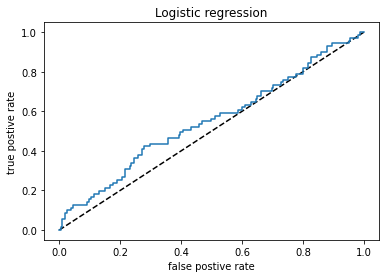

0.5238022018574328

In [261]:
#AUC score for Lostic rerssion model
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Logistic regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

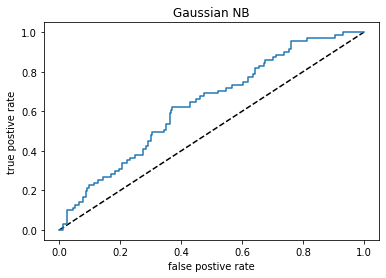

0.76111691985977

In [262]:
#AUC score for Gaussian NB model
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian NB')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Gaussian NB')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

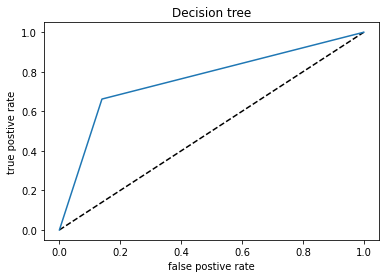

0.76111691985977

In [263]:
#AUC score for Decision Tree model
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Decision tree')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

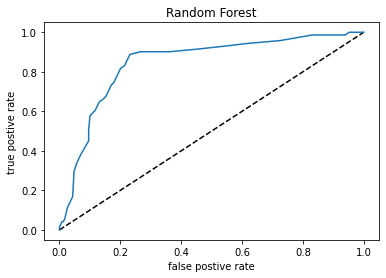

0.6552063472538286

In [264]:
#AUC score for Random Forest model
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Random Forest')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

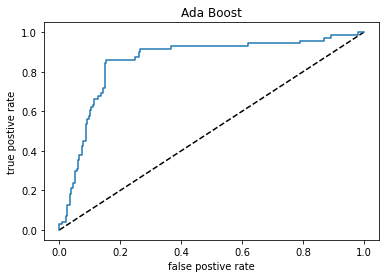

0.709853004489821

In [265]:
#AUC score for Add Boost model
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Ada Boost classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Ada Boost')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

Since the Decision Tree classifier Has the highest area under the curve , same accurace score before and after Cross validation.So based on the materics score , area under the curve,and Cross validation. Decsion Tree classifier is the best model to predict the Insurance Claims Fraud Detection.

# HyperParameter tuning

In [276]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(5,15),'criterion':['gini','entropy'],'max_features':['auto', 'sqrt'],'random_state':np.arange(40,100)}

In [277]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [278]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt'],
                         'random_state': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [279]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'random_state': 66}

In [287]:
# Decision Tree Classifier
final=DecisionTreeClassifier(criterion= 'entropy',max_depth= 10,max_features= 'auto',random_state= 100)
final.fit(x_train,y_train)
final.score(x_train,y_train)
preddtc=final.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7833333333333333
[[194  35]
 [ 30  41]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       229
         1.0       0.54      0.58      0.56        71

    accuracy                           0.78       300
   macro avg       0.70      0.71      0.71       300
weighted avg       0.79      0.78      0.79       300



# Save the best Model

In [288]:
import joblib
joblib.dump(final,'Model_Insurance-Claim-Fraud.obj')

['Model_Insurance-Claim-Fraud.obj']